# MOOD-BASED MUSIC RECOMMENDER

## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train', 'val']
# original = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
inner_names = ['angry', 'happy', 'sad', 'calm']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry = 0
happy = 0
sad = 0
calm = 0
angry_val = 0
happy_val = 0
sad_val = 0
calm_val = 0
angry_test = 0
happy_test = 0
sad_test = 0
calm_test = 0

df = pd.read_csv('fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)

In [2]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [3]:
# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 28709: #28709 full dataset
        if df['emotion'][i] == 0:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train\angry\im"+str(angry)+".png")
            angry += 1
        elif df['emotion'][i] == 1:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train\happy\im"+str(happy)+".png")
            happy += 1
        elif df['emotion'][i] == 2:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train\sad\im"+str(sad)+".png")
            sad += 1
        elif df['emotion'][i] == 3:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train\calm\im"+str(calm)+".png")
            calm += 1
    # val
    elif i>28709 and i<32298:
      if df['emotion'][i] == 0:
        img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val\angry\im"+str(angry_val)+".png")
        angry_val += 1
      elif df['emotion'][i] == 1:
        img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val\happy\im"+str(happy_val)+".png")
        happy_val += 1
      elif df['emotion'][i] == 2:
        img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val\sad\im"+str(sad_val)+".png")
        sad_val += 1
      elif df['emotion'][i] == 3:
        img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val\calm\im"+str(calm_val)+".png")
        calm_val += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test\angry\im"+str(angry_test)+".png")
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test\happy\im"+str(happy_test)+".png")
            happy_test += 1
        elif df['emotion'][i] == 2:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test\sad\im"+str(sad_test)+".png")
            sad_test += 1
        elif df['emotion'][i] == 3:
            img.save(r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test\calm\im"+str(calm_test)+".png")
            calm_test += 1

print("Done!")

100%|███████████████████████████████████████████████████████████████████████████| 35887/35887 [03:40<00:00, 162.62it/s]

Done!


## EDA

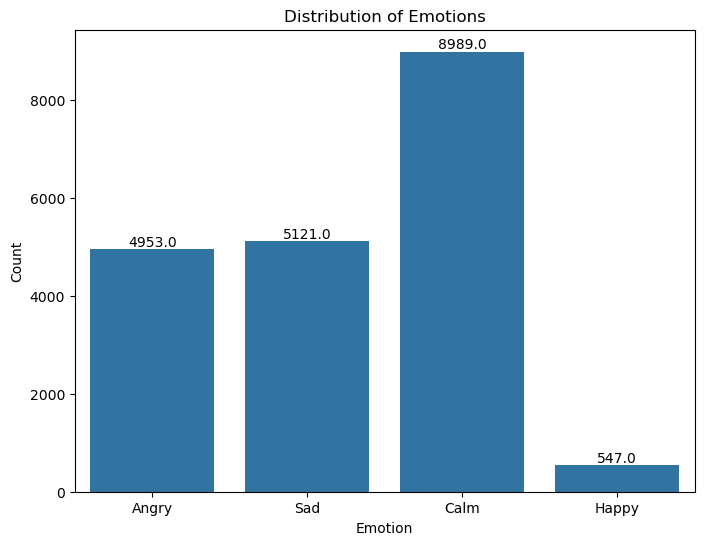

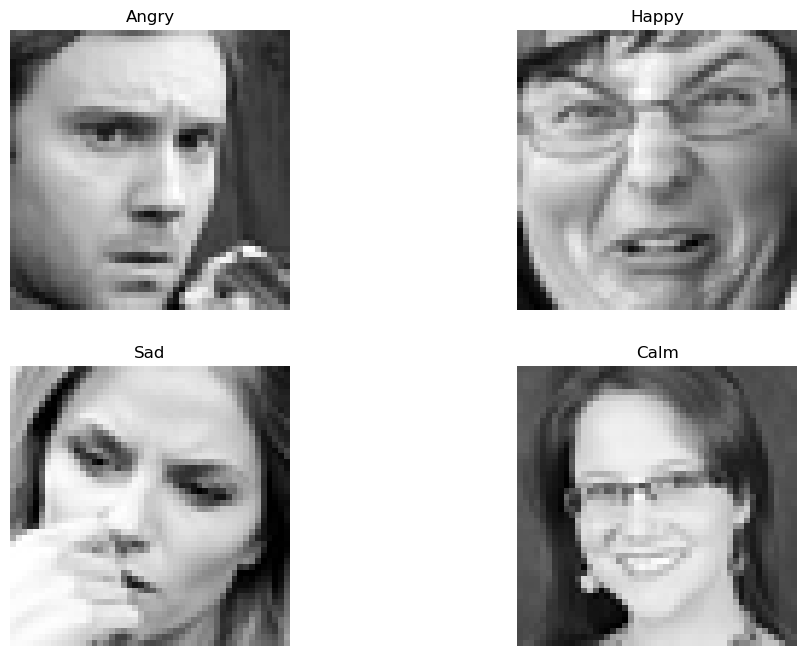

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numeric labels to emotion labels
emotion_mapping = {0: 'Angry', 1: 'Happy', 2: 'Sad', 3: 'Calm'}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# Distribution of Emotions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Sample Images for each Emotion
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()
    sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))
    plt.imshow(sample_image, cmap='gray')
    plt.title(emotion_mapping[i])
    plt.axis('off')
plt.show()

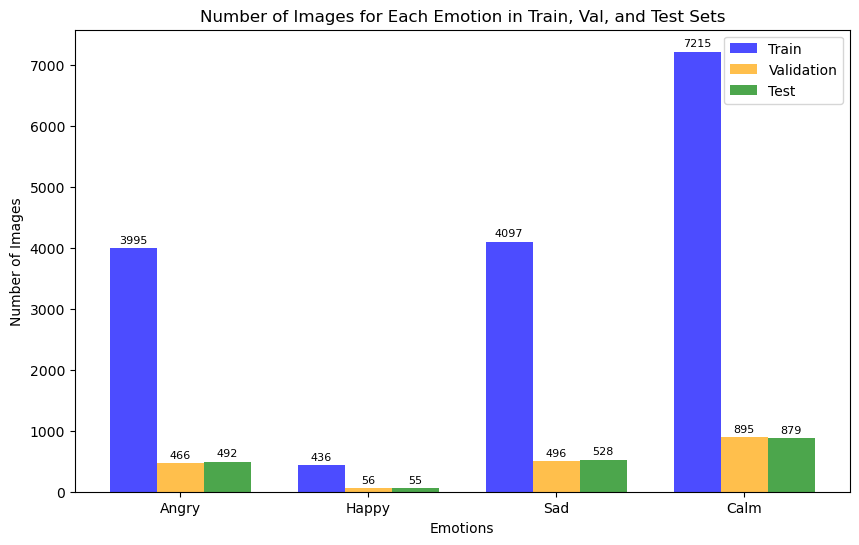

In [5]:
import matplotlib.pyplot as plt

# Count the number of images for each emotion in train, val, and test sets
train_counts = [angry, happy, sad, calm]
val_counts = [angry_val, happy_val, sad_val, calm_val]
test_counts = [angry_test, happy_test, sad_test, calm_test]

emotions = ['Angry', 'Happy', 'Sad', 'Calm']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))
bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=8)

add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.show()

## Model Training

In [6]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# plots accuracy and loss curves
def plot_model_history(model_history):

    'Plot Accuracy and Loss curves with the model_history'

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Directories
train_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train"
val_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val"
test_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test"

# Parameters
num_train = 28709
num_val = 3589
batch_size = 64
num_epoch = 50

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",  # Convert grayscale to 3 channels (ResNet requires 3 channels)
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')

# Load the ResNet50 model, excluding the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replaces Flatten
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Assuming 4 emotion classes, adjust if necessary

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

# Add EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with callbacks
model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size,
        callbacks=[early_stopping, reduce_lr])

# Optionally, evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Found 15743 images belonging to 4 classes.
Found 1913 images belonging to 4 classes.
Found 1954 images belonging to 4 classes.
Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 102s 178ms/step - accuracy: 0.4274 - loss: 1.2460 - val_accuracy: 0.4736 - val_loss: 1.1576 - learning_rate: 0.0010
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 72s 160ms/step - accuracy: 0.4535 - loss: 1.1506 - val_accuracy: 0.4783 - val_loss: 1.1328 - learning_rate: 0.0010
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.4652 - loss: 1.1423 - val_accuracy: 0.4767 - val_loss: 1.1247 - learning_rate: 0.0010
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.4627 - loss: 1.1366 - val_accuracy: 0.4825 - val_loss: 1.1223 - learning_rate: 0.0010
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.4617 - loss: 1.1441 - val_accuracy: 0.4741 - val_loss: 1.1186 - learning_rate: 0.0010
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 64s 141ms/step - accuracy: 0.4672 - loss: 1.1335 - val_ac

Epoch 43/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 67s 148ms/step - accuracy: 0.4957 - loss: 1.0886 - val_accuracy: 0.5102 - val_loss: 1.0790 - learning_rate: 1.0000e-05
Epoch 44/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.5000 - loss: 1.0845 - val_accuracy: 0.5123 - val_loss: 1.0794 - learning_rate: 1.0000e-05
Epoch 45/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.5002 - loss: 1.0901 - val_accuracy: 0.5107 - val_loss: 1.0783 - learning_rate: 1.0000e-05
Epoch 46/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 136ms/step - accuracy: 0.4979 - loss: 1.0868 - val_accuracy: 0.5128 - val_loss: 1.0783 - learning_rate: 1.0000e-05
Epoch 47/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.4998 - loss: 1.0866 - val_accuracy: 0.5123 - val_loss: 1.0787 - learning_rate: 1.0000e-05
Epoch 48/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 62s 137ms/step - accuracy: 0.4962 - loss: 1.0882 - val_accuracy: 0.5107 - val_loss: 1.0788 - learning_rate: 1.0000e-05
Epoch 49/50
448/448 ━━━━━━━━━━━━━━━━━━━━

In [10]:
# Evaluate the model on the test dataset
eval_result = model.evaluate(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.5242 - loss: 1.0659
Test Loss: 1.082913875579834
Test Accuracy: 0.5148413777351379


In [11]:
model.save_weights('model1_weights_training.weights.h5')
model.save('model1_new_training.h5')

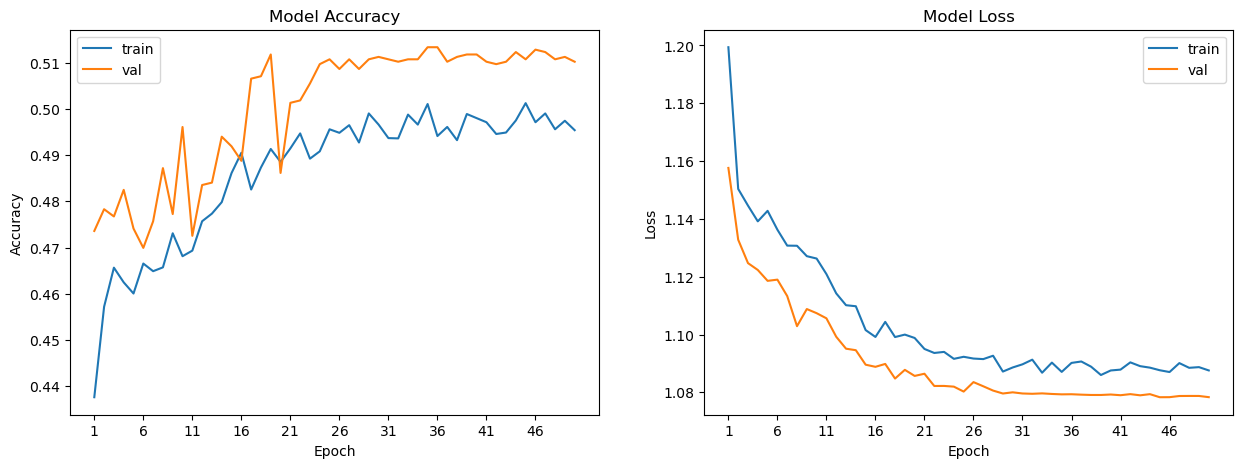

In [12]:
plot_model_history(model_info)

In [13]:
model_history_df = pd.DataFrame(model_info.history)
model_history_df

accuracy      loss  val_accuracy  val_loss  learning_rate
0   0.437655  1.199390      0.473602  1.157638        0.00100
1   0.457219  1.150374      0.478306  1.132804        0.00100
2   0.465667  1.144599      0.476738  1.124707        0.00100
3   0.462491  1.139154      0.482488  1.122337        0.00100
4   0.460077  1.142793      0.474124  1.118574        0.00100
5   0.466557  1.136267      0.469943  1.118990        0.00100
6   0.464905  1.130761      0.475693  1.113314        0.00100
7   0.465731  1.130710      0.487193  1.102897        0.00100
8   0.473099  1.127113      0.477261  1.108816        0.00100
9   0.468145  1.126290      0.496079  1.107393        0.00100
10  0.469351  1.120915      0.472556  1.105610        0.00100
11  0.475703  1.114239      0.483534  1.099233        0.00020
12  0.477355  1.110147      0.484056  1.095105        0.00020
13  0.479832  1.109788      0.493989  1.094583        0.00020
14  0.486121  1.101543      0.491898  1.089571        0.00020
15  0.490504  1.099166      0.488761  1.088833        0.00020
16  0.482564  1.104380      0.506534  1.089831        0.00020
17  0.487328  1.099131      0.507057  1.084773        0.00020
18  0.491329  1.099979      0.511762  1.087786        0.00020
19  0.488535  1.098814      0.486147  1.085686        0.00020
20  0.491457  1.095016      0.501307  1.086440        0.00020
21  0.494696  1.093626      0.501830  1.082206        0.00004
22  0.489233  1.093996      0.505489  1.082222        0.00004
23  0.490821  1.091593      0.509671  1.081976        0.00004
24  0.495585  1.092306      0.510716  1.080269        0.00004
25  0.494823  1.091694      0.508625  1.083545        0.00004
26  0.496475  1.091504      0.510716  1.082102        0.00004
27  0.492727  1.092669      0.508625  1.080613        0.00004
28  0.499015  1.087192      0.510716  1.079601        0.00001
29  0.496602  1.088607      0.511239  1.080013        0.00001
30  0.493680  1.089698      0.510716  1.079612        0.00001
31  0.493616  1.091309      0.510193  1.079504        0.00001
32  0.498761  1.086793      0.510716  1.079646        0.00001
33  0.496602  1.090287      0.510716  1.079445        0.00001
34  0.501048  1.087081      0.513330  1.079309        0.00001
35  0.494124  1.090187      0.513330  1.079349        0.00001
36  0.496094  1.090677      0.510193  1.079204        0.00001
37  0.493235  1.088876      0.511239  1.079096        0.00001
38  0.498888  1.086001      0.511762  1.079092        0.00001
39  0.497999  1.087573      0.511762  1.079254        0.00001
40  0.497110  1.087866      0.510193  1.079010        0.00001
41  0.494569  1.090373      0.509671  1.079385        0.00001
42  0.494887  1.089064      0.510193  1.078976        0.00001
43  0.497491  1.088546      0.512284  1.079376        0.00001
44  0.501239  1.087651      0.510716  1.078317        0.00001
45  0.497110  1.087029      0.512807  1.078335        0.00001
46  0.499015  1.090120      0.512284  1.078738        0.00001
47  0.495585  1.088490      0.510716  1.078761        0.00001
48  0.497427  1.088725      0.511239  1.078754        0.00001
49  0.495395  1.087584      0.510193  1.078341        0.00001

In [14]:
model_history_df.to_csv('model1_history.csv')

In [15]:
index_where_equal = (model_history_df['loss'] - model_history_df['val_loss']).abs().idxmin()
index_where_min = model_history_df['val_loss'].idxmin()
index_where_equal, index_where_min

(38, 44)

Least Validation Loss is observed after 44 epochs, hence we retrain the model for 45 epochs.

In [17]:
# Directories
train_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\train"
val_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\val"
test_dir = r"C:\Users\lione\Documents\AI_2024\DL-MINIPROJ\data\test"

# Parameters
num_train = 28709
num_val = 3589
batch_size = 64
num_epoch = 45

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",  # Convert grayscale to 3 channels (ResNet requires 3 channels)
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="rgb",
        class_mode='categorical')

# Load the ResNet50 model, excluding the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replaces Flatten
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Assuming 4 emotion classes, adjust if necessary

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

# Add EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with callbacks
model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size,
        callbacks=[early_stopping, reduce_lr])

# Optionally, evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Found 15743 images belonging to 4 classes.
Found 1913 images belonging to 4 classes.
Found 1954 images belonging to 4 classes.
Epoch 1/45
246/448 ━━━━━━━━━━━━━━━━━━━━ 1:00 299ms/step - accuracy: 0.4104 - loss: 1.3405

C:\Users\lione\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 107s 193ms/step - accuracy: 0.4221 - loss: 1.2820 - val_accuracy: 0.4694 - val_loss: 1.1330 - learning_rate: 0.0010
Epoch 2/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 80s 177ms/step - accuracy: 0.4581 - loss: 1.1441 - val_accuracy: 0.4715 - val_loss: 1.1249 - learning_rate: 0.0010
Epoch 3/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 77s 170ms/step - accuracy: 0.4584 - loss: 1.1444 - val_accuracy: 0.4773 - val_loss: 1.1261 - learning_rate: 0.0010
Epoch 4/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 76s 167ms/step - accuracy: 0.4627 - loss: 1.1426 - val_accuracy: 0.4830 - val_loss: 1.1306 - learning_rate: 0.0010
Epoch 5/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 73s 163ms/step - accuracy: 0.4630 - loss: 1.1393 - val_accuracy: 0.4809 - val_loss: 1.1231 - learning_rate: 0.0010
Epoch 6/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 76s 168ms/step - accuracy: 0.4680 - loss: 1.1363 - val_accuracy: 0.4767 - val_loss: 1.1164 - learning_rate: 0.0010
Epoch 7/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 75s 167ms/step - accuracy: 0.4682 - loss

Epoch 44/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 48s 107ms/step - accuracy: 0.4992 - loss: 1.0850 - val_accuracy: 0.5050 - val_loss: 1.0752 - learning_rate: 1.0000e-05
Epoch 45/45
448/448 ━━━━━━━━━━━━━━━━━━━━ 48s 106ms/step - accuracy: 0.4984 - loss: 1.0875 - val_accuracy: 0.5065 - val_loss: 1.0756 - learning_rate: 1.0000e-05
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.5354 - loss: 1.0766
Test Loss: 1.0805987119674683, Test Accuracy: 0.5250767469406128


In [18]:
# Evaluate the model on the test dataset
eval_result = model.evaluate(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.5300 - loss: 1.0888
Test Loss: 1.0805989503860474
Test Accuracy: 0.5250767469406128


In [19]:
model.save_weights('model1_weights_training_optimal.weights.h5')
model.save('model1_new_training_optimal.h5')

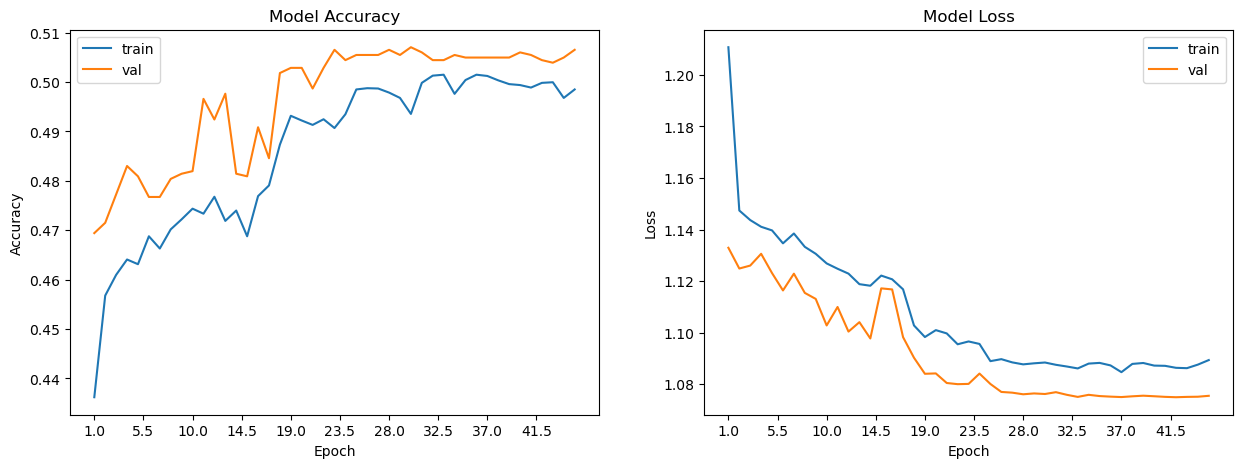

In [20]:
plot_model_history(model_info)

## Confusion Matrix

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step


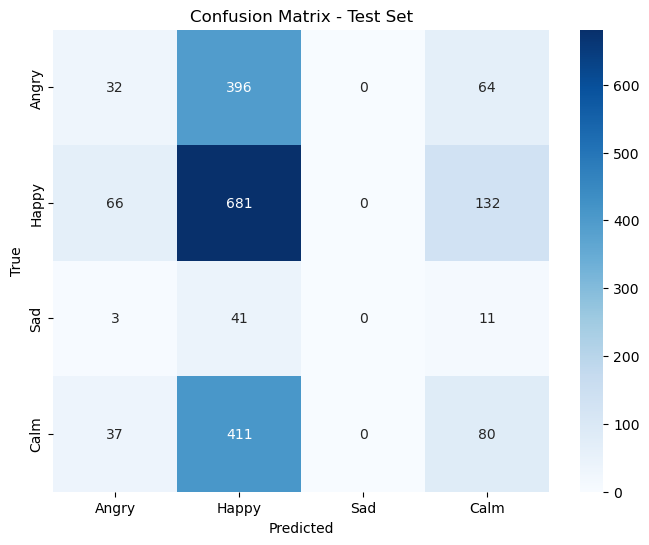


Classification Report:
               precision    recall  f1-score   support

       Angry       0.23      0.07      0.10       492
       Happy       0.45      0.77      0.57       879
         Sad       0.00      0.00      0.00        55
        Calm       0.28      0.15      0.20       528

    accuracy                           0.41      1954
   macro avg       0.24      0.25      0.22      1954
weighted avg       0.33      0.41      0.33      1954



C:\Users\lione\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lione\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lione\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ... (your existing code)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=emotions))

## Emotion Prediction

In [22]:
import numpy as np
# from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [24]:
# Load the ResNet50 model, excluding the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model's layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Replaces Flatten
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Assuming 4 emotion classes, adjust if necessary

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications import ResNet50
import cv2

# Load ResNet50 model pre-trained on ImageNet with the correct number of classes (1024)
model = ResNet50(weights=None, input_shape=(224, 224, 3), classes=1024)
model.load_weights('C:/Users/lione/Documents/AI_2024/DL-MINIPROJ/model1_weights_training_optimal.weights.h5')

# Modify the last layer to match 4 output classes
x = model.layers[-2].output  # Get output from the layer before the last Dense layer
output = Dense(4, activation='softmax')(x)  # Add new Dense layer with 4 classes
model = Model(inputs=model.input, outputs=output)

# Now the model has the correct 4 output classes

# Define your emotion_recog function
def emotion_recog(frame):
    # Prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # Dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Sad", 2: "Happy", 3: "Calm"}

    # Load the face cascade classifier
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if len(faces) > 0:
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
            roi_gray = gray[y:y + h, x:x + w]
            cropped_img = cv2.resize(frame[y:y + h, x:x + w], (224, 224))  # Resize to 224x224 for ResNet50
            cropped_img = cropped_img.astype('float32') / 255  # Normalize pixel values
            cropped_img = np.expand_dims(cropped_img, axis=0)  # Add batch dimension
            prediction = model.predict(cropped_img)  # Predict emotion
            maxindex = int(np.argmax(prediction))  # Get the index of the highest predicted emotion
            cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('LIVE', frame)
    else:
        return frame, None  # No face detected
    
    return frame, emotion_dict[maxindex]

In [63]:
def record_video(seconds):
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame_height, frame_width, _ = frame.shape
    out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))
    
    # Capture video for a specific duration (e.g., 5 seconds)
    capture_duration = seconds  # in seconds
    start_time = cv2.getTickCount() / cv2.getTickFrequency()
    
    print("Processing Video...")
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            out.release()
            break
        output, output_emotion = emotion_recog(frame)
        out.write(output)
        
        elapsed_time = (cv2.getTickCount() / cv2.getTickFrequency()) - start_time
        if elapsed_time >= capture_duration:
            break
        # Press 'q' to exit the loop early
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    out.release()
    cap.release()
    cv2.destroyAllWindows()
    print(f"Done processing video for {capture_duration} seconds")
    return output_emotion

# Song Recommender

In [60]:
#Basic
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#Clsutering and Recommendations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
df = pd.read_csv('genres_v2.csv')
df.head()

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\3376641696.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [29]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

## Data Cleaning

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [31]:
df[df['song_name'].isnull()]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
18597         0.714   0.821    6    -7.635     1       0.1760      0.041000   
19677         0.811   0.445    8   -10.105     1       0.2740      0.045300   
19678         0.763   0.654   11    -9.423     0       0.5060      0.087500   
19679         0.759   0.530    9    -8.897     1       0.2880      0.004940   
19680         0.535   0.427   10    -9.658     0       0.0512      0.139000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
18597          0.000000    0.1160    0.649  ...  69gRFGOWY9OMpFJgFol1u0   
19677          0.000000    0.1090    0.250  ...  13q8un4Xjs3IOfdem4jgVe   
19678          0.000003    0.1390    0.277  ...  7B2NTZXEPeshkufbqT1gMN   
19679          0.000000    0.1960    0.329  ...  5BtGgEaMNYuXfK69d9FJDs   
19680          0.001290    0.1100    0.195  ...  7euujXy941mB6TL7uANTxz   
...                 ...       ...      ...  ...                     ...   
42300          0.000345    0.1210    0.394  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050    0.383  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850    0.124  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575    0.488  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140    0.134  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
18597  spotify:track:69gRFGOWY9OMpFJgFol1u0   
19677  spotify:track:13q8un4Xjs3IOfdem4jgVe   
19678  spotify:track:7B2NTZXEPeshkufbqT1gMN   
19679  spotify:track:5BtGgEaMNYuXfK69d9FJDs   
19680  spotify:track:7euujXy941mB6TL7uANTxz   
...                                     ...   
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
18597  https://api.spotify.com/v1/tracks/69gRFGOWY9OM...   
19677  https://api.spotify.com/v1/tracks/13q8un4Xjs3I...   
19678  https://api.spotify.com/v1/tracks/7B2NTZXEPesh...   
19679  https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...   
19680  https://api.spotify.com/v1/tracks/7euujXy941mB...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
18597  https://api.spotify.com/v1/audio-analysis/69gR...      282707   
19677  https://api.spotify.com/v1/audio-analysis/13q8...      154082   
19678  https://api.spotify.com/v1/audio-analysis/7B2N...      160522   
19679  https://api.spotify.com/v1/audio-analysis/5BtG...      197303   
19680  https://api.spotify.com/v1/audio-analysis/7euu...      121887   
...                                                  ...         ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      

In [32]:
#dropping rows with no song names and no uri and then dropping duplicates as well

# Drop rows with no song names and no URI
df = df.dropna(subset=['song_name', 'uri'])

# Remove duplicate rows based on 'song_name' and 'uri'
df = df.drop_duplicates(subset=['song_name', 'uri'])

# Get the count of final rows
final_row_count = len(df)

print("Count of final rows:", final_row_count)

Count of final rows: 18352


## EDA

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\1874282743.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')


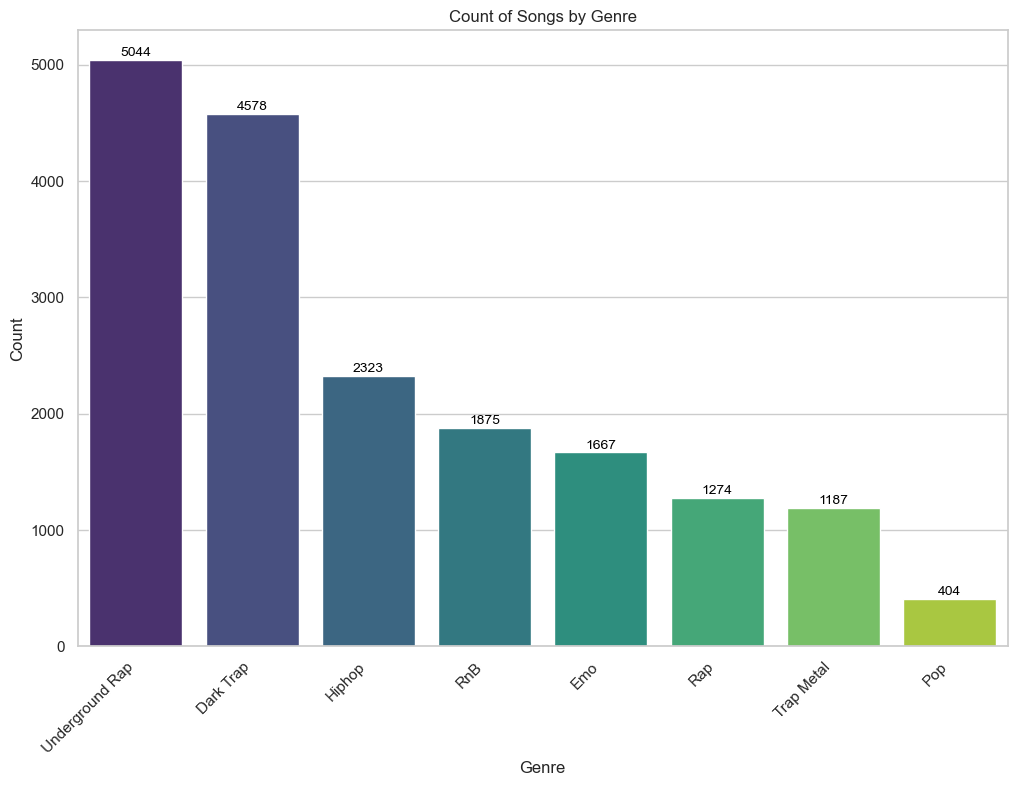

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a count plot with count labels using sns.countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()

In [34]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x='valence',
    y='energy',
    z='genre',
    color='genre',
    size_max=10,  # Set the maximum marker size
    opacity=0.7,  # Set marker opacity
    symbol='genre',  # Use different marker symbols for each genre
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Genre',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='Genre',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9),  # Set the initial view angle
        )
    )
)

# Show the plot
fig.show()

In [35]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200       0.05980   
1             0.719   0.493    8    -7.230     1       0.0794       0.40100   
2             0.850   0.893    5    -4.783     1       0.0623       0.01380   
3             0.476   0.781    0    -4.710     1       0.1030       0.02370   
4             0.798   0.624    2    -7.668     1       0.2930       0.21700   
...             ...     ...  ...       ...   ...          ...           ...   
21519         0.526   0.819    7    -6.728     1       0.2980       0.00206   
21520         0.538   0.819    1    -6.780     1       0.4670       0.00854   
21521         0.415   0.548    7    -8.563     1       0.2850       0.22400   
21522         0.785   0.648    7    -6.907     1       0.2790       0.01570   
21523         0.747   0.832    3    -5.737     0       0.1850       0.23300   

       instrumentalness  liveness  valence    tempo  \
0              0.013400    0.0556   0.3890  156.985   
1              0.000000    0.1180   0.1240  115.080   
2              0.000004    0.3720   0.0391  218.050   
3              0.000000    0.1140   0.1750  186.948   
4              0.000000    0.1660   0.5910  147.988   
...                 ...       ...      ...      ...   
21519          0.000003    0.3360   0.5810  159.910   
21520          0.000000    0.1310   0.2520  160.299   
21521          0.000000    0.1220   0.5280  154.272   
21522          0.001980    0.1000   0.5060  184.160   
21523          0.000014    0.1300   0.7330  188.760   

                                        uri      genre  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx  Dark Trap   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p  Dark Trap   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy  Dark Trap   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu  Dark Trap   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3  Dark Trap   
...                                     ...        ...   
21519  spotify:track:54v6Kv41W8AKToCb14PmJD     Hiphop   
21520  spotify:track:4YuGxSdxyL6fRD7uchn9dI     Hiphop   
21521  spotify:track:034dSXepspHaYFW7rZZx1d     Hiphop   
21522  spotify:track:7oCZpPJcPDZfeIy2t6gqSg     Hiphop   
21523  spotify:track:2kpwzDrLK5KoIk1S5wftX7     Hiphop   

                                               song_name  
0                                    Mercury: Retrograde  
1                                              Pathology  
2                                               Symbiote  
3          ProductOfDrugs (Prod. The Virus and Antidote)  
4                                                  Venom  
...                                                  ...  
21519  H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...  
21520                                       Daddy's Girl  
21521                                                '94  
21522                                        Born 2 Live  
21523                                      Can't Hold On  

[18352 rows x 14 columns]

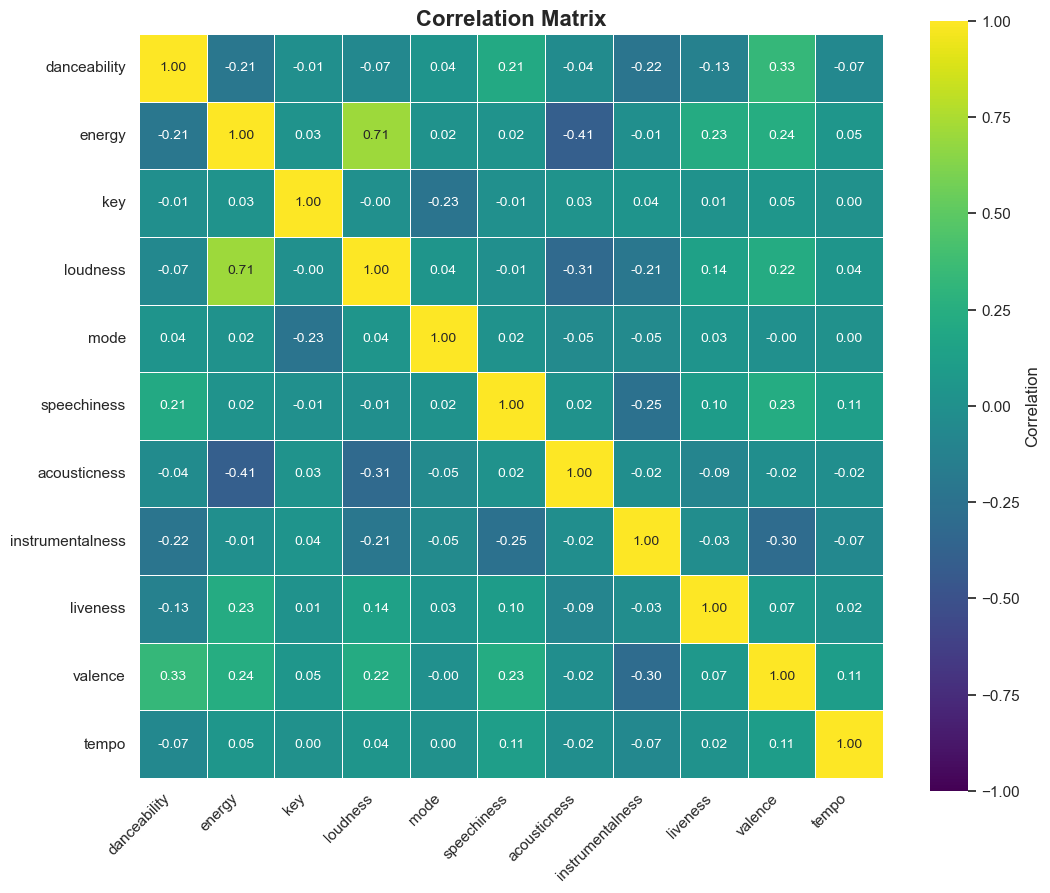

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Selecting only numeric columns from the DataFrame
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))

# Use the 'coolwarm' colormap with the same color palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)
plt.show()

In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18352 entries, 0 to 21523
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18352 non-null  float64
 1   energy            18352 non-null  float64
 2   key               18352 non-null  int64  
 3   loudness          18352 non-null  float64
 4   mode              18352 non-null  int64  
 5   speechiness       18352 non-null  float64
 6   acousticness      18352 non-null  float64
 7   instrumentalness  18352 non-null  float64
 8   liveness          18352 non-null  float64
 9   valence           18352 non-null  float64
 10  tempo             18352 non-null  float64
 11  uri               18352 non-null  object 
 12  genre             18352 non-null  object 
 13  song_name         18352 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


## K means Technique

In [38]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\2065314466.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



danceability    energy       key  loudness      mode  speechiness  \
0          1.020577  0.868988 -0.856638 -0.096101  0.854028     1.734850   
1          0.329285 -0.932612  0.773751 -0.050914  0.854028    -0.680405   
2          1.137849  1.312372 -0.041444  0.774257  0.854028    -0.801664   
3         -1.170570  0.683777 -1.400101  0.798873  0.854028    -0.513053   
4          0.816892 -0.197380 -0.856638 -0.198615  0.854028     0.834271   
...             ...       ...       ...       ...       ...          ...   
21519     -0.861958  0.897050  0.502019  0.118369  0.854028     0.869727   
21520     -0.787891  0.897050 -1.128370  0.100834  0.854028     2.068136   
21521     -1.547077 -0.623927  0.502019 -0.500424  0.854028     0.777541   
21522      0.736653 -0.062681  0.502019  0.058007  0.854028     0.734994   
21523      0.502108  0.970012 -0.584907  0.452551 -1.170922     0.068423   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.515983         -0.302673 -0.921993 -0.127645  0.159685   
1          1.095488         -0.360457 -0.508370 -1.257259 -1.285537   
2         -0.733239         -0.360440  1.175288 -1.619161  2.265699   
3         -0.686482         -0.360457 -0.534884 -1.039861  1.193051   
4          0.226465         -0.360457 -0.190198  0.733419 -0.150604   
...             ...               ...       ...       ...       ...   
21519     -0.788686         -0.360443  0.936660  0.690793  0.260563   
21520     -0.758081         -0.360457 -0.422198 -0.711634  0.273978   
21521      0.259525         -0.360457 -0.481855  0.464870  0.066119   
21522     -0.724265         -0.351919 -0.627684  0.371090  1.096898   
21523      0.302032         -0.360397 -0.428827  1.338722  1.255543   

                                        uri      genre  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx  Dark Trap   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p  Dark Trap   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy  Dark Trap   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu  Dark Trap   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3  Dark Trap   
...                                     ...        ...   
21519  spotify:track:54v6Kv41W8AKToCb14PmJD     Hiphop   
21520  spotify:track:4YuGxSdxyL6fRD7uchn9dI     Hiphop   
21521  spotify:track:034dSXepspHaYFW7rZZx1d     Hiphop   
21522  spotify:track:7oCZpPJcPDZfeIy2t6gqSg     Hiphop   
21523  spotify:track:2kpwzDrLK5KoIk1S5wftX7     Hiphop   

                                               song_name  
0                                    Mercury: Retrograde  
1                                              Pathology  
2                                               Symbiote  
3          ProductOfDrugs (Prod. The Virus and Antidote)  
4                                                  Venom  
...                                                  ...  
21519  H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...  
21520                                       Daddy's Girl  
21521                                                '94  
21522                                        Born 2 Live  
21523                                      Can't Hold On  

[18352 rows x 14 columns]

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\979910810.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



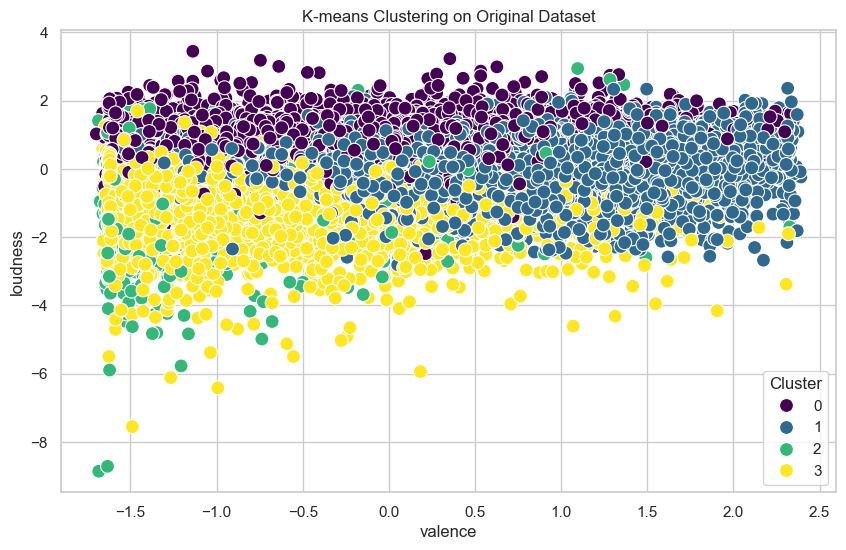

In [39]:
#  K-Means Clustering without PCA

X = filtered_df.drop(['uri','genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()

## Clustering with PCA & Kmeans

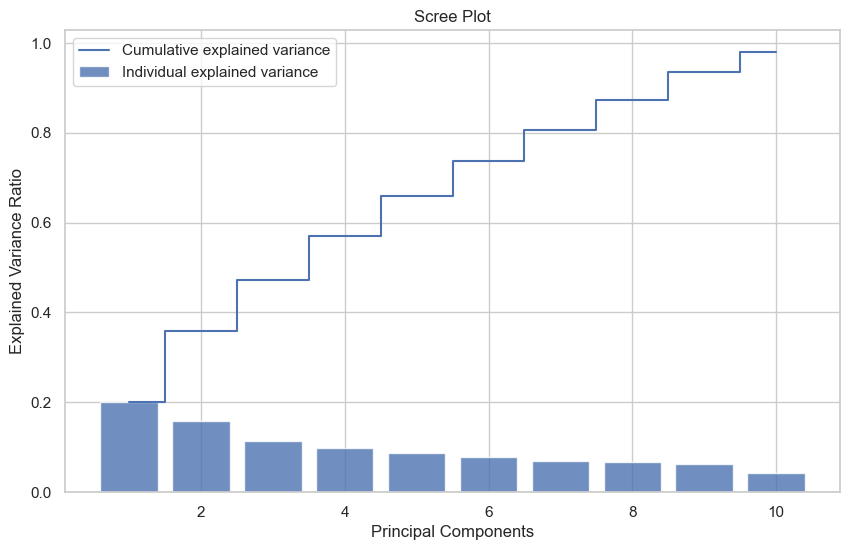

In [40]:
# Perform PCA
n_components = 10  # Set a higher value initially
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()

In [41]:
# 4. Perform PCA
n_components = 4  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[-0.74729341, -1.23863762, -1.23011329, -0.19451128],
       [ 1.5678939 ,  0.0729223 , -0.32552114, -0.87823353],
       [-1.44584131,  0.74249617, -0.74215366,  1.01669114],
       ...,
       [ 0.44862149, -0.23462046, -0.07725616,  0.91485627],
       [-0.58530391, -1.08221556, -0.21588203,  0.10470561],
       [-1.18116072, -0.88273037,  0.73865583,  0.21430425]])

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\92538273.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



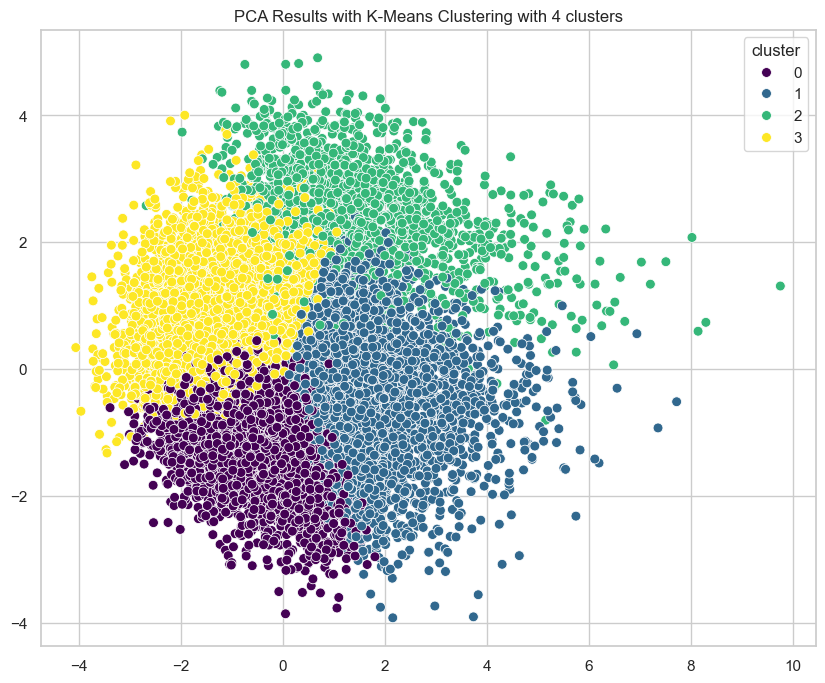

In [42]:
# 5. K-Means Clustering on PCA Results
n_clusters = 4 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [43]:
filtered_df_pca

danceability    energy       key  loudness      mode  speechiness  \
0          1.020577  0.868988 -0.856638 -0.096101  0.854028     1.734850   
1          0.329285 -0.932612  0.773751 -0.050914  0.854028    -0.680405   
2          1.137849  1.312372 -0.041444  0.774257  0.854028    -0.801664   
3         -1.170570  0.683777 -1.400101  0.798873  0.854028    -0.513053   
4          0.816892 -0.197380 -0.856638 -0.198615  0.854028     0.834271   
...             ...       ...       ...       ...       ...          ...   
21519     -0.861958  0.897050  0.502019  0.118369  0.854028     0.869727   
21520     -0.787891  0.897050 -1.128370  0.100834  0.854028     2.068136   
21521     -1.547077 -0.623927  0.502019 -0.500424  0.854028     0.777541   
21522      0.736653 -0.062681  0.502019  0.058007  0.854028     0.734994   
21523      0.502108  0.970012 -0.584907  0.452551 -1.170922     0.068423   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.515983         -0.302673 -0.921993 -0.127645  0.159685   
1          1.095488         -0.360457 -0.508370 -1.257259 -1.285537   
2         -0.733239         -0.360440  1.175288 -1.619161  2.265699   
3         -0.686482         -0.360457 -0.534884 -1.039861  1.193051   
4          0.226465         -0.360457 -0.190198  0.733419 -0.150604   
...             ...               ...       ...       ...       ...   
21519     -0.788686         -0.360443  0.936660  0.690793  0.260563   
21520     -0.758081         -0.360457 -0.422198 -0.711634  0.273978   
21521      0.259525         -0.360457 -0.481855  0.464870  0.066119   
21522     -0.724265         -0.351919 -0.627684  0.371090  1.096898   
21523      0.302032         -0.360397 -0.428827  1.338722  1.255543   

                                        uri      genre  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx  Dark Trap   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p  Dark Trap   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy  Dark Trap   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu  Dark Trap   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3  Dark Trap   
...                                     ...        ...   
21519  spotify:track:54v6Kv41W8AKToCb14PmJD     Hiphop   
21520  spotify:track:4YuGxSdxyL6fRD7uchn9dI     Hiphop   
21521  spotify:track:034dSXepspHaYFW7rZZx1d     Hiphop   
21522  spotify:track:7oCZpPJcPDZfeIy2t6gqSg     Hiphop   
21523  spotify:track:2kpwzDrLK5KoIk1S5wftX7     Hiphop   

                                               song_name  cluster  
0                                    Mercury: Retrograde        0  
1                                              Pathology        1  
2                                               Symbiote        3  
3          ProductOfDrugs (Prod. The Virus and Antidote)        3  
4                                                  Venom        0  
...                                                  ...      ...  
21519  H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...        3  
21520                                       Daddy's Girl        3  
21521                                                '94        1  
21522                                        Born 2 Live        0  
21523                                      Can't Hold On        0  

[18352 rows x 15 columns]

## EDA on clusters and assigning them moods

In [44]:
filtered_df_pca['cluster'].value_counts()

cluster
0    6654
3    5294
1    4760
2    1644
Name: count, dtype: int64

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\1006300820.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



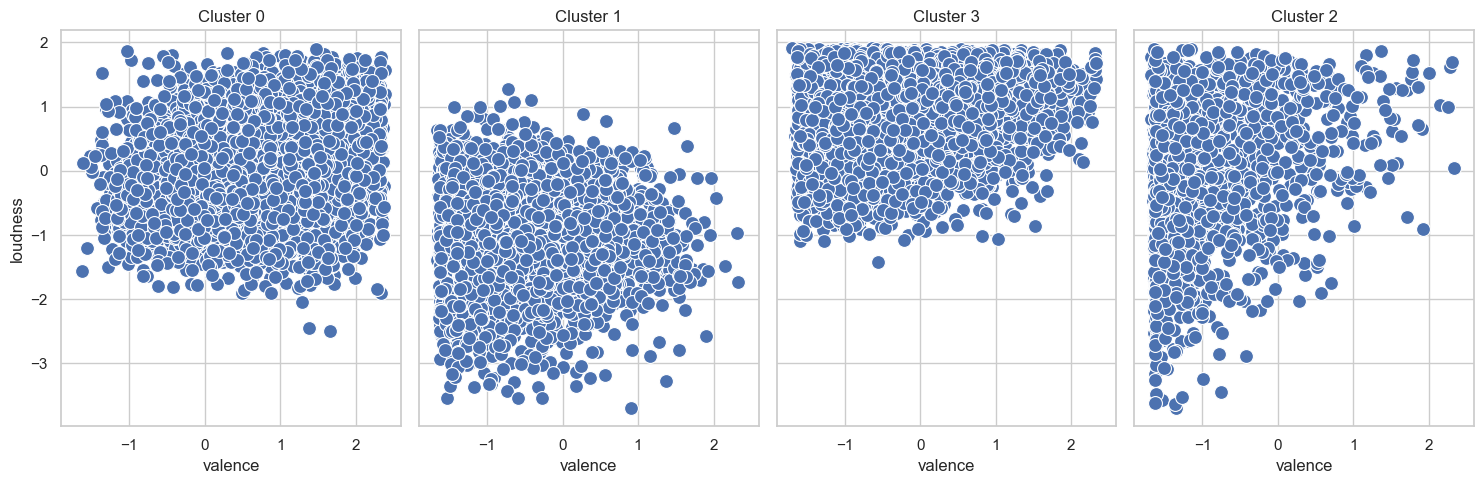

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()

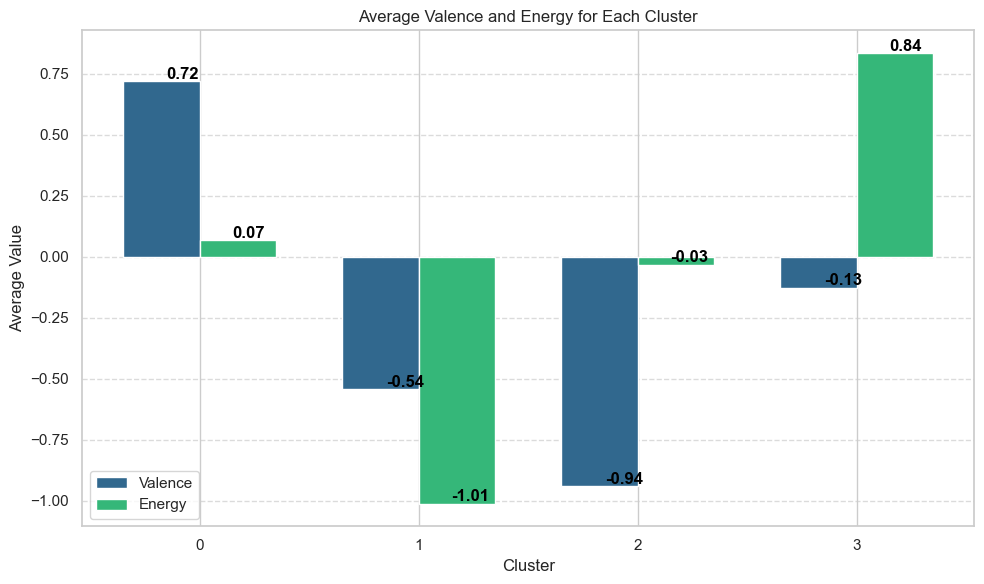

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', 2)

# Plotting the average 'valence' and 'energy' for each cluster in grouped bars
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [47]:
#Label each cluster with specific mood

filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Sad', np.nan)
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Calm', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Angry', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Happy', filtered_df_pca['mood'])

filtered_df_pca

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\2358552013.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\2358552013.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lione\AppData\Local\Temp\ipykernel_9236\2358552013.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

danceability    energy       key  loudness      mode  speechiness  \
0          1.020577  0.868988 -0.856638 -0.096101  0.854028     1.734850   
1          0.329285 -0.932612  0.773751 -0.050914  0.854028    -0.680405   
2          1.137849  1.312372 -0.041444  0.774257  0.854028    -0.801664   
3         -1.170570  0.683777 -1.400101  0.798873  0.854028    -0.513053   
4          0.816892 -0.197380 -0.856638 -0.198615  0.854028     0.834271   
...             ...       ...       ...       ...       ...          ...   
21519     -0.861958  0.897050  0.502019  0.118369  0.854028     0.869727   
21520     -0.787891  0.897050 -1.128370  0.100834  0.854028     2.068136   
21521     -1.547077 -0.623927  0.502019 -0.500424  0.854028     0.777541   
21522      0.736653 -0.062681  0.502019  0.058007  0.854028     0.734994   
21523      0.502108  0.970012 -0.584907  0.452551 -1.170922     0.068423   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.515983         -0.302673 -0.921993 -0.127645  0.159685   
1          1.095488         -0.360457 -0.508370 -1.257259 -1.285537   
2         -0.733239         -0.360440  1.175288 -1.619161  2.265699   
3         -0.686482         -0.360457 -0.534884 -1.039861  1.193051   
4          0.226465         -0.360457 -0.190198  0.733419 -0.150604   
...             ...               ...       ...       ...       ...   
21519     -0.788686         -0.360443  0.936660  0.690793  0.260563   
21520     -0.758081         -0.360457 -0.422198 -0.711634  0.273978   
21521      0.259525         -0.360457 -0.481855  0.464870  0.066119   
21522     -0.724265         -0.351919 -0.627684  0.371090  1.096898   
21523      0.302032         -0.360397 -0.428827  1.338722  1.255543   

                                        uri      genre  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx  Dark Trap   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p  Dark Trap   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy  Dark Trap   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu  Dark Trap   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3  Dark Trap   
...                                     ...        ...   
21519  spotify:track:54v6Kv41W8AKToCb14PmJD     Hiphop   
21520  spotify:track:4YuGxSdxyL6fRD7uchn9dI     Hiphop   
21521  spotify:track:034dSXepspHaYFW7rZZx1d     Hiphop   
21522  spotify:track:7oCZpPJcPDZfeIy2t6gqSg     Hiphop   
21523  spotify:track:2kpwzDrLK5KoIk1S5wftX7     Hiphop   

                                               song_name  cluster   mood  
0                                    Mercury: Retrograde        0    Sad  
1                                              Pathology        1   Calm  
2                                               Symbiote        3  Happy  
3          ProductOfDrugs (Prod. The Virus and Antidote)        3  Happy  
4                                                  Venom        0    Sad  
...                                                  ...      ...    ...  
21519  H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...        3  Happy  
21520                                       Daddy's Girl        3  Happy  
21521                                                '94        1   Calm  
21522                                        Born 2 Live        0    Sad  
21523                                      Can't Hold On        0    Sad  

[18352 rows x 16 columns]

## EDA on the moods

### 1. Number of songs assigned to each mood

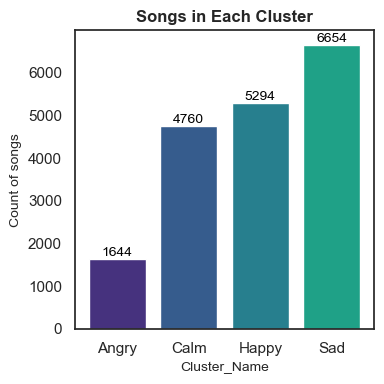

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style without gridlines
sns.set(style="white")

# Get value counts of each unique value in 'cluster' column
cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(4, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

# Display count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

### 2. Count of songs of all genres in each mood

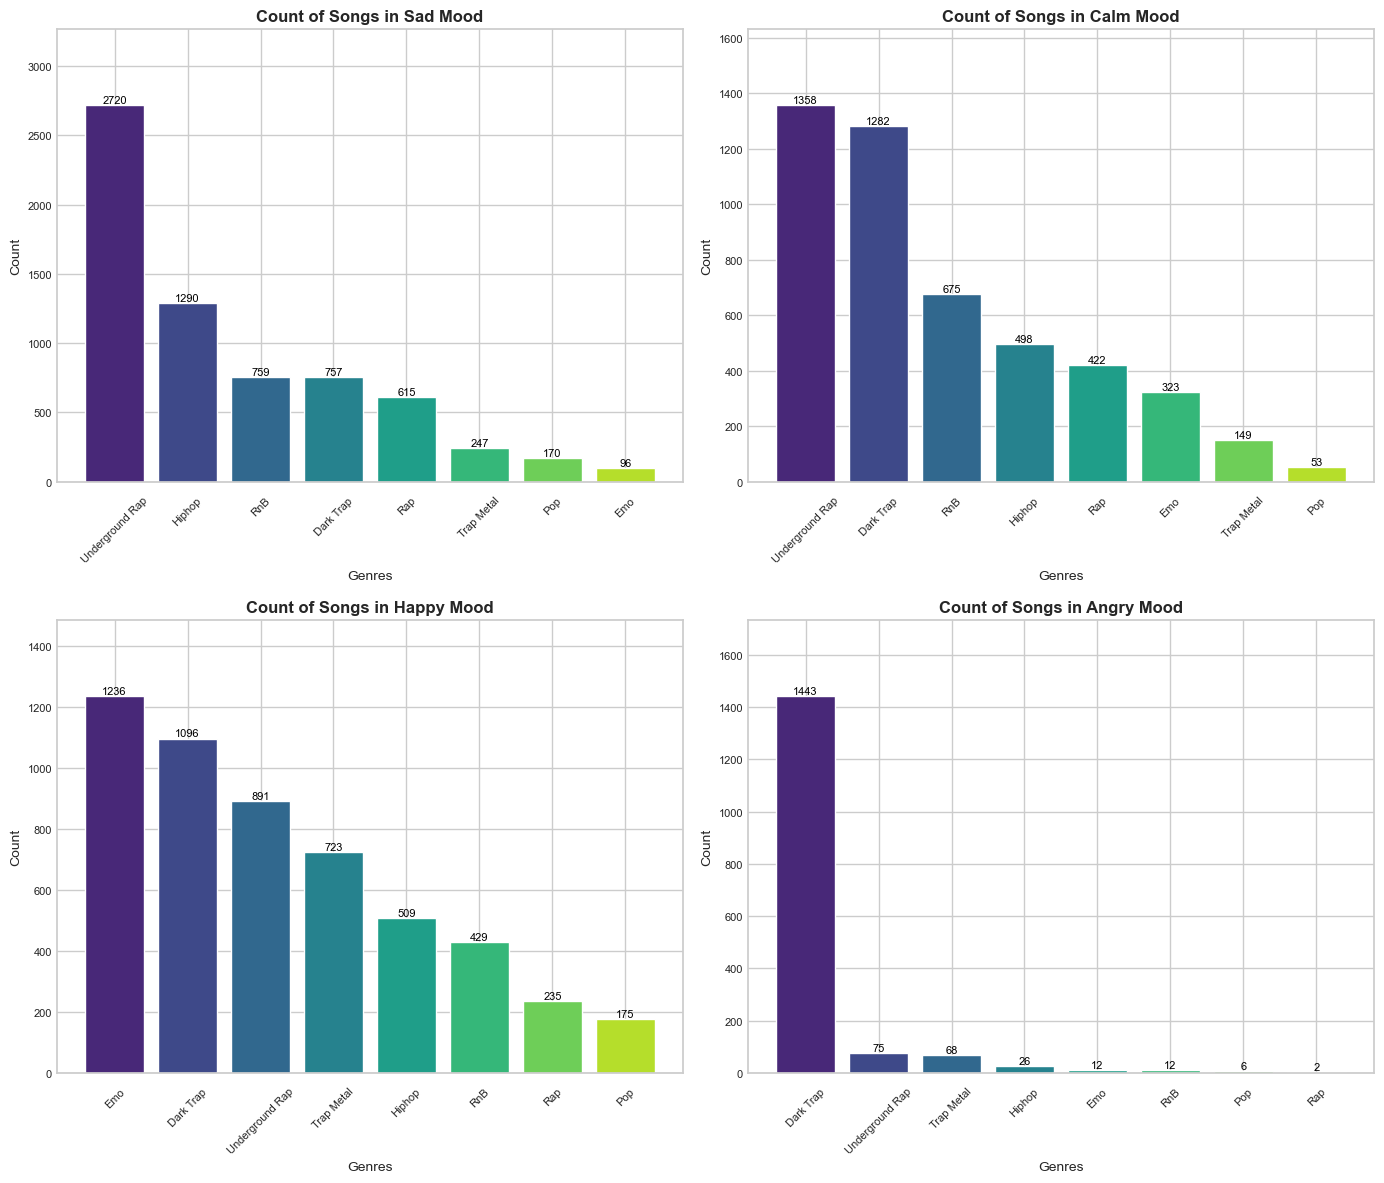

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2
    
    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()
    
    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values, color=colors)
    
    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

    # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

### 3. Percentage (of total number of songs in each genre) of songs of genres in each mood

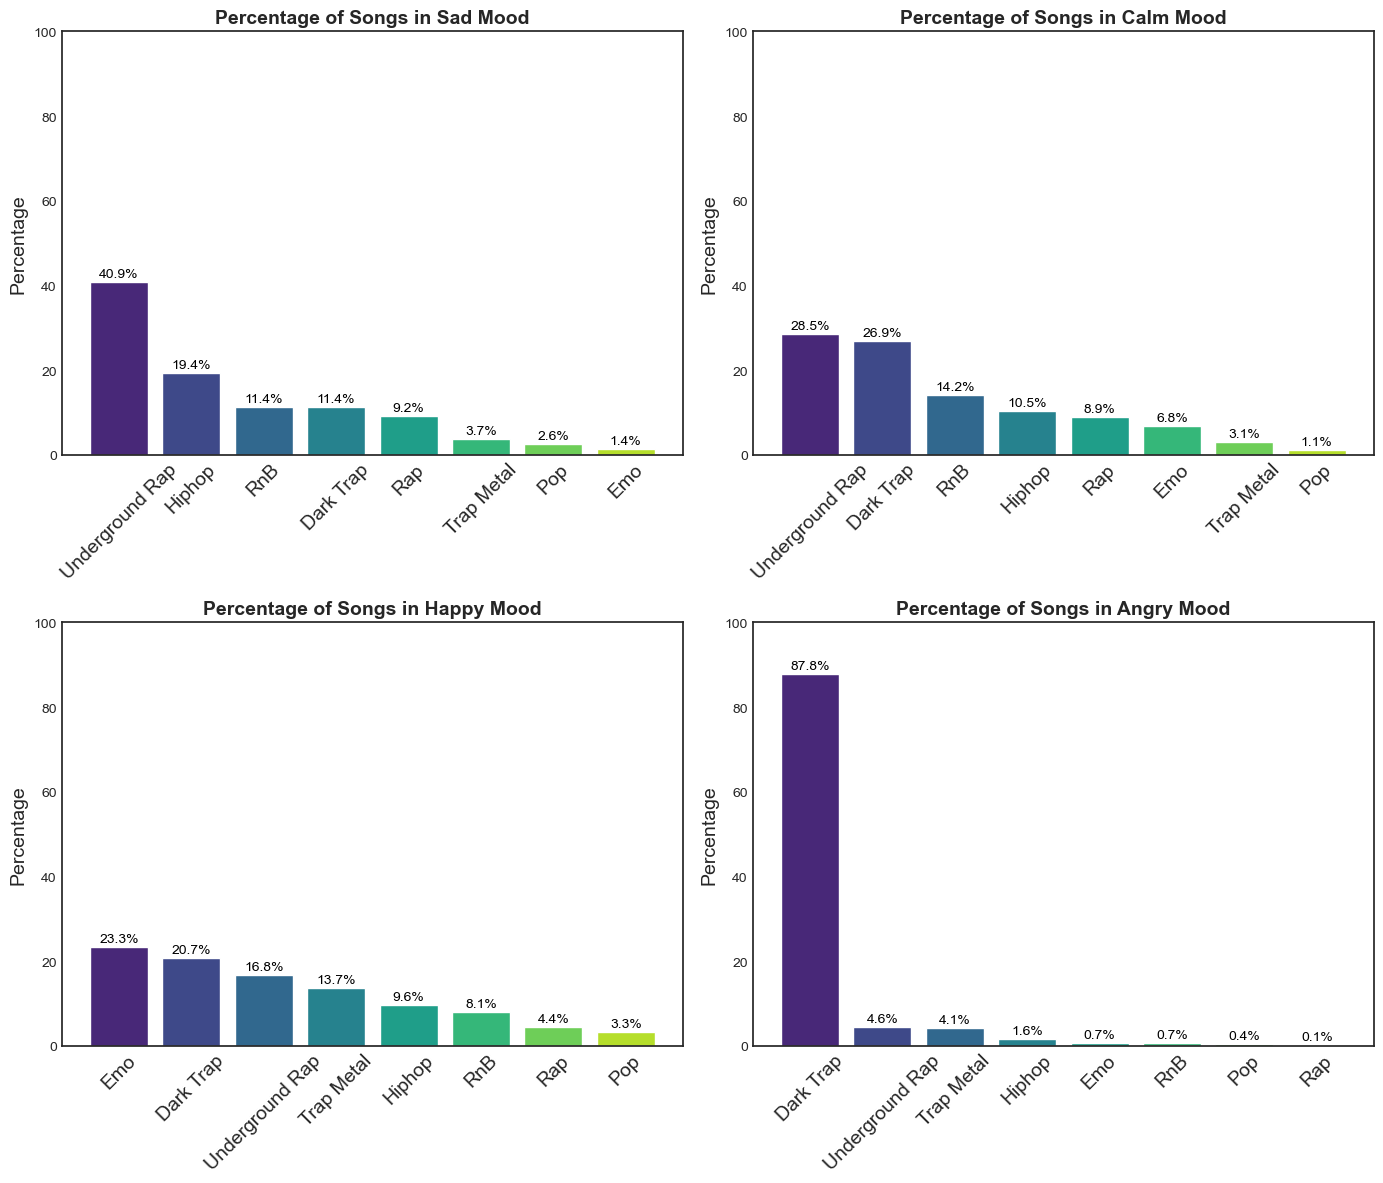

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="white")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2
    
    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()
    
    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values / genre_counts.sum() * 100, color=colors)
    
    axes[row, col].set_title(f'Percentage of Songs in {mood} Mood', fontsize=14, fontweight='bold')
    #axes[row, col].set_xlabel('Genres', fontsize=12)
    axes[row, col].set_ylabel('Percentage', fontsize=14)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='both', which='both', length=0)  # Remove ticks
    axes[row, col].set_ylim(0, 100)

    # Display percentages above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

## Recommending a song on the basis of user choice and mood using content based filtering technique

In [69]:
# Record video and detect mood
detected_mood = record_video(5)  # Input the number of seconds for which the video has to be recorded

Processing Video...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65

In [70]:
# Filter DataFrame based on detected mood
if detected_mood:
    filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]

    # Select 5 random songs from the filtered DataFrame
    random_songs = filtered_by_mood.sample(5)['song_name']

    print("Detected mood is:", detected_mood)
    print("Random songs based on detected mood:")
    print(random_songs)
else:
    print("No face detected, unable to determine mood.")

Detected mood is: Happy
Random songs based on detected mood:
1428                                    Sore Loser
791                                Sleep Paralysis
15967                        Shawty (feat. T-Pain)
17801    Club Can't Handle Me (feat. David Guetta)
2563                                    Night Call
Name: song_name, dtype: object


In [71]:
filtered_by_mood = filtered_by_mood.drop_duplicates(subset=['song_name'])

In [72]:
filtered_by_mood

danceability    energy       key  loudness      mode  speechiness  \
2          1.137849  1.312372 -0.041444  0.774257  0.854028    -0.801664   
3         -1.170570  0.683777 -1.400101  0.798873  0.854028    -0.513053   
6          0.323113  0.049568  0.773751  0.983668  0.854028    -0.271953   
7          0.174979  0.290904  0.773751  0.524041  0.854028     0.323706   
8          0.668759  0.515403 -1.128370  1.562670  0.854028     0.160609   
...             ...       ...       ...       ...       ...          ...   
21491     -0.195355  1.503196 -0.856638  0.880480  0.854028    -0.649204   
21497     -1.318704 -0.057068  0.230288  0.303839 -1.170922    -0.378321   
21502     -0.466934  0.425603 -0.856638  0.726709  0.854028     0.862635   
21519     -0.861958  0.897050  0.502019  0.118369  0.854028     0.869727   
21520     -0.787891  0.897050 -1.128370  0.100834  0.854028     2.068136   

       acousticness  instrumentalness  liveness   valence     tempo  \
2         -0.733239         -0.360440  1.175288 -1.619161  2.265699   
3         -0.686482         -0.360457 -0.534884 -1.039861  1.193051   
6         -0.678453         -0.326822 -0.468598 -1.623850 -0.742488   
7         -0.610914         -0.360457 -0.548141 -0.579490 -0.493381   
8         -0.508426         -0.360457 -0.807981 -0.980184  2.331571   
...             ...               ...       ...       ...       ...   
21491     -0.670896         -0.360457 -0.636964  1.965338 -0.215924   
21497     -0.508426         -0.360457 -0.818587  0.579962 -0.670167   
21502     -0.667590         -0.360457 -0.748324 -0.089280  1.786384   
21519     -0.788686         -0.360443  0.936660  0.690793  0.260563   
21520     -0.758081         -0.360457 -0.422198 -0.711634  0.273978   

                                        uri      genre  \
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy  Dark Trap   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu  Dark Trap   
6      spotify:track:0XfQbq7DaMOmVXgQ71eA6E  Dark Trap   
7      spotify:track:0LLeuNBWPOg3XA73yab3PT  Dark Trap   
8      spotify:track:37gqBnUAZe8BY8WR56kDNk  Dark Trap   
...                                     ...        ...   
21491  spotify:track:31qgVdvSqTQ7unwQQngycB     Hiphop   
21497  spotify:track:18SQ99AVrnZOcgpTSUVSfL     Hiphop   
21502  spotify:track:1E8wif6bVXurUgxV8Gfwrw     Hiphop   
21519  spotify:track:54v6Kv41W8AKToCb14PmJD     Hiphop   
21520  spotify:track:4YuGxSdxyL6fRD7uchn9dI     Hiphop   

                                               song_name  cluster   mood  
2                                               Symbiote        3  Happy  
3          ProductOfDrugs (Prod. The Virus and Antidote)        3  Happy  
6                                     kamikaze (+ pulse)        3  Happy  
7                    T.R.U. (Totally Rotten Underground)        3  Happy  
8                           I Put My Dick in Your Mental        3  Happy  
...                                                  ...      ...    ...  
21491                   Can't Hold Us (feat. Ray Dalton)        3  Happy  
21497                                           Ain't Me        3  Happy  
21502                                        Gangsta Luv        3  Happy  
21519  H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...        3  Happy  
21520                                       Daddy's Girl        3  Happy  

[4652 rows x 16 columns]

In [73]:
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics.pairwise import cosine_similarity


# Initialize top_recommendation_uri as a global variable
top_recommendation_uri = None

# Create a dropdown widget for song selection
song_dropdown = widgets.Dropdown(
    options=random_songs,
    description='Select a song:'
)

# Display the dropdown widget
display(song_dropdown)

# Function to handle song selection
def on_song_selection(change):
    global top_recommendation_uri  # Declare top_recommendation_uri as a global variable

    selected_song = change.new
    print(f"You selected: {selected_song}")

    # Check if the user-selected song is in the filtered DataFrame
    if selected_song in filtered_by_mood['song_name'].values:
        selected_song_features = filtered_by_mood.loc[filtered_by_mood['song_name'] == selected_song, ['energy', 'valence']].values.flatten()
        all_songs_features = filtered_by_mood[['energy', 'valence']].values

        similarities = cosine_similarity([selected_song_features], all_songs_features)
        result_df = pd.DataFrame({'song_name': filtered_by_mood['song_name'], 'similarity': similarities.flatten(),'uri':filtered_by_mood['uri']})
        result_df = result_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)
        result_df = result_df[result_df['song_name'] != selected_song]
        top_3_recommendations = result_df.head(3)

        print("Top 3 recommendations based on energy and valence:")
        print(top_3_recommendations[['song_name', 'similarity']])

        # Fetching URI of the top recommendation
        top_recommendation_uri = top_3_recommendations.loc[result_df.iloc[0].name, 'uri']
        print(f"URI of top recommendation: {top_recommendation_uri}")
# Registering the function to observe changes in the dropdown value
song_dropdown.observe(on_song_selection, names='value')

# Now you can access top_recommendation_uri outside the function
print(top_recommendation_uri)

Dropdown(description='Select a song:', options=('Sore Loser', 'Sleep Paralysis', 'Shawty (feat. T-Pain)', "Clu…

None
You selected: Sleep Paralysis
Top 3 recommendations based on energy and valence:
             song_name  similarity
1          Dead Inside    0.999999
2  What You Got - Main    0.999998
3                a lot    0.999997
URI of top recommendation: spotify:track:7nc10nkSdlkFi4j2EO4BD5


In [74]:
print(top_recommendation_uri)

spotify:track:7nc10nkSdlkFi4j2EO4BD5


## Play the top recommended song from Spotify

In [78]:
# Get the list of user's available devices
devices = sp.devices()

if not devices['devices']:
    print("No active devices found.")
else:
    for device in devices['devices']:
        print(f"Device Name: {device['name']}, Device ID: {device['id']}, Type: {device['type']}, Is Active: {device['is_active']}")


Device Name: PHOENIXLEO-25, Device ID: 62bc84486d7e6939f719168ff3eba5c4a2f8ee5e, Type: Computer, Is Active: True


In [79]:
active_devices = [device for device in devices['devices'] if device['is_active']]

if active_devices:
    device_id = active_devices[0]['id']  # Use the first active device
    print(f"Using device: {active_devices[0]['name']}")
else:
    print("No active devices found.")
    device_id = None  # Handle accordingly

Using device: PHOENIXLEO-25


In [77]:
import spotipy
import os
import time
from spotipy.oauth2 import SpotifyOAuth

os.system("open /Applications/Spotify.app")
time.sleep(4)

# Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', and 'YOUR_REDIRECT_URI' with your actual Spotify credentials
client_id = 'ccc12221c5704162a86dc4f90dc27bcf'
client_secret = '6ca7c2fe992f4b688c2b6378667bfd30'
redirect_uri = 'http://localhost:5000/callback'  # Make sure this matches your Spotify app settings

# Set up the Spotify OAuth object with user authentication
scope = 'user-modify-playback-state user-read-playback-state'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

# Get the list of user's available devices
devices = sp.devices()
device_id = None

# Check if there are available devices
if devices['devices']:
    device_id = devices['devices'][0]['id']  # Use the first available device

# Start playback of the specified track with the selected device
sp.start_playback(device_id=device_id, uris=[top_recommendation_uri])